In [21]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import GridSearchCV



In [22]:
boston = load_boston()

In [23]:
X, y = boston.data, boston.target

In [24]:
boston = pd.DataFrame(boston.data, columns = boston.feature_names)

In [25]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [28]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [29]:
boston['CHAS']=boston['CHAS'].astype(object)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(12), object(1)
memory usage: 51.5+ KB


In [30]:
boston[['CRIM','ZN','INDUS','AGE','LSTAT']] = boston[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((boston[['CRIM','ZN','INDUS','AGE','LSTAT']].mean()))

In [31]:
boston['CHAS']=boston['CHAS'].fillna(method='bfill')

In [32]:
X=boston.iloc[:,0:-1]
y=boston.iloc[:,-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [33]:
y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
regressor = DecisionTreeRegressor(max_depth=3)
DT_reg=regressor.fit(X_train, y_train)
DT_reg

DecisionTreeRegressor(max_depth=3)

In [36]:
print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))

0.6589829919481487
0.46252871385745664


In [37]:
y_pred=DT_reg.predict(X_test)
y_pred

array([ 6.00289256, 20.291     , 11.50797753, 28.14733333, 11.50797753,
       17.263875  , 17.263875  , 10.05131579, 17.263875  , 11.50797753,
       20.291     , 20.291     , 11.50797753, 28.14733333, 11.50797753,
        6.00289256, 11.50797753,  6.00289256,  6.00289256, 10.05131579,
        6.00289256, 17.263875  , 11.50797753,  6.00289256, 10.05131579,
       28.14733333, 17.263875  , 17.263875  ,  6.00289256, 11.50797753,
       20.291     , 11.50797753,  6.00289256, 10.05131579,  6.00289256,
       17.263875  , 20.291     , 20.291     , 20.291     , 11.50797753,
       11.50797753, 10.05131579, 10.05131579, 28.14733333,  6.00289256,
        6.00289256, 17.263875  , 11.50797753, 17.263875  , 11.50797753,
       11.50797753, 17.263875  , 10.05131579,  6.00289256, 17.263875  ,
       17.263875  , 10.05131579, 10.05131579, 20.291     , 17.263875  ,
       10.05131579, 11.50797753,  6.00289256,  6.00289256, 20.291     ,
        6.00289256, 11.50797753, 11.50797753, 20.291     , 17.26

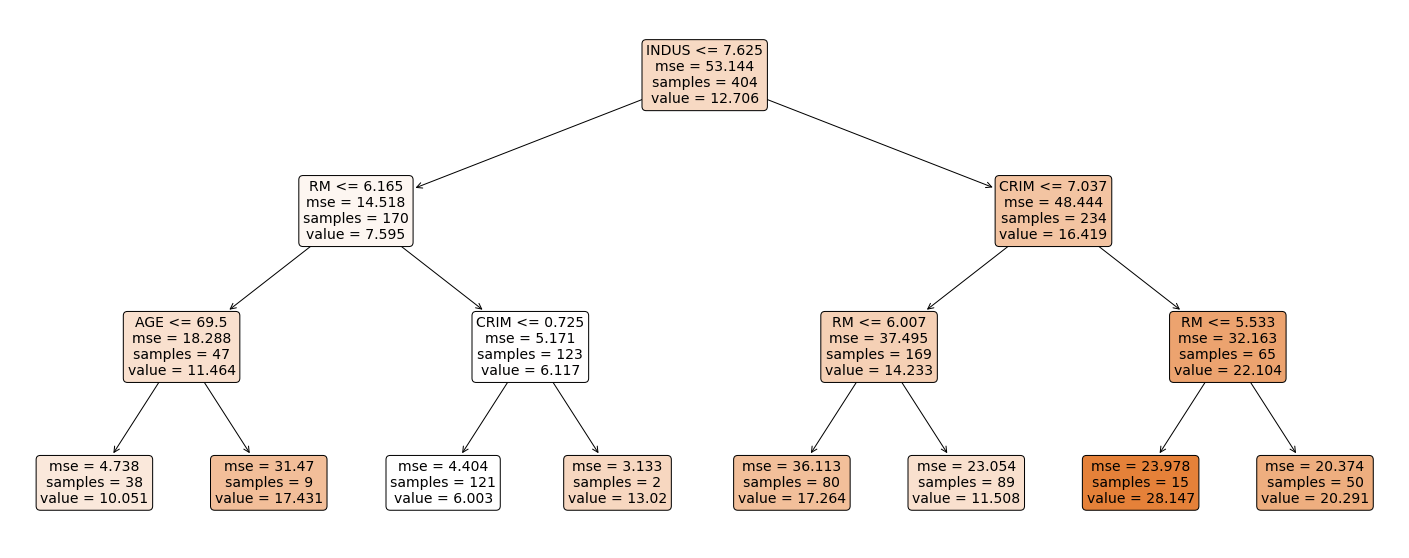

In [38]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [39]:
params = {"min_samples_split": range(2, 21, 2),
          "min_samples_leaf": range(1, 21, 2),
          'splitter':('best', 'random'),
          'max_features': ('auto','sqrt','log2'),
          'max_depth': (None, 3 , 4, 5)}

forest = DecisionTreeRegressor()

rf = GridSearchCV(forest, params, cv=5)

rf.fit(X_train, y_train)
rf.best_params_



{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 18,
 'splitter': 'random'}

In [40]:
sorted(rf.cv_results_.keys())

predictions = rf.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, predictions))
print('MSE', mse)



MSE 4.553262669179148
